<a href="https://colab.research.google.com/github/dwishashah/Stock-Sentiment-Analysis-Using-NLP/blob/main/Stock_Market_Forecasting_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas_datareader as pdr
key="f9bed1c9075f8e7c0b4c49b4dd5e276532509a1b"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-2-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0
1,AAPL,2018-09-18 00:00:00+00:00,218.24,221.85,217.12,217.79,31571712,52.250114,53.114405,51.981968,52.142377,126286848,0.0,1.0
2,AAPL,2018-09-19 00:00:00+00:00,218.37,219.62,215.30,218.50,27123833,52.281238,52.580508,51.546231,52.312362,108495332,0.0,1.0
3,AAPL,2018-09-20 00:00:00+00:00,220.03,222.28,219.15,220.24,26608794,52.678668,53.217354,52.467982,52.728946,106435176,0.0,1.0
4,AAPL,2018-09-21 00:00:00+00:00,217.66,221.36,217.29,220.78,96246748,52.111253,52.997091,52.022669,52.858230,384986992,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-09-08 00:00:00+00:00,178.18,180.239,177.79,178.35,65602066,178.18,180.239,177.79,178.35,65602066,0.0,1.0
1253,AAPL,2023-09-11 00:00:00+00:00,179.36,180.300,177.34,180.07,58953052,179.36,180.300,177.34,180.07,58953052,0.0,1.0
1254,AAPL,2023-09-12 00:00:00+00:00,176.30,180.130,174.82,179.49,90370192,176.30,180.130,174.82,179.49,90370192,0.0,1.0
1255,AAPL,2023-09-13 00:00:00+00:00,174.21,177.300,173.98,176.51,84267928,174.21,177.300,173.98,176.51,84267928,0.0,1.0
1256,AAPL,2023-09-14 00:00:00+00:00,175.74,176.100,173.58,174.00,60895757,175.74,176.100,173.58,174.00,60895757,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [10]:
df.shape

(1257, 14)

In [9]:
df1

0       217.88
1       218.24
2       218.37
3       220.03
4       217.66
         ...  
1252    178.18
1253    179.36
1254    176.30
1255    174.21
1256    175.74
Name: close, Length: 1257, dtype: float64

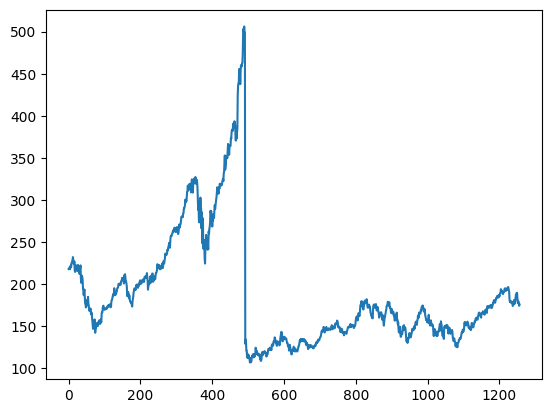

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
import numpy as np

Scaling df between 0 to 1

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.27812148]
 [0.27902317]
 [0.27934878]
 ...
 [0.17397621]
 [0.16874139]
 [0.17257358]]


Splitting dataset into train and test split

In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 440)

Convert an array of values into a dataset matrix

In [18]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

Reshape input to be [samples, time steps, features] which is required for LSTM

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Create the Stacked LSTM model

In [24]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 190ms/step - loss: 0.0354 - val_loss: 6.6155e-04
Epoch 2/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0139 - val_loss: 0.0021
Epoch 3/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0109 - val_loss: 3.8827e-04
Epoch 4/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0104 - val_loss: 0.0011
Epoch 5/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0086 - val_loss: 0.0020
Epoch 6/100
12/12 [==============================] - 1s 115ms/step - loss: 0.0079 - val_loss: 3.6017e-04
Epoch 7/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0077 - val_loss: 0.0012
Epoch 8/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0069 - val_loss: 6.9067e-04
Epoch 9/100
12/12 [==============================] - 1s 115ms/step - loss: 0.0059 - val_loss: 8.6058e-04
Epoch 10/100
12/12 [==============================] - 1s 115ms/step - l

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.13.0'

Prediction and check performance metrics

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 22ms/step


Transformback to original form


In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

RMSE performance metrics

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

225.85330831650398

Test Data RMSE


In [35]:
math.sqrt(mean_squared_error(ytest,test_predict))

160.90909938356774

Plotting

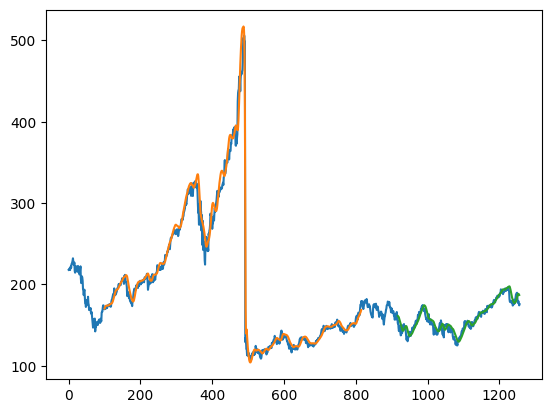

In [36]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19997495303694424,
 0.19644333124608637,
 0.2034314339386349,
 0.2064120225422667,
 0.2072636192861615,
 0.21823

Demonstrate prediction for next 10 days

In [43]:
from numpy import array

lst_output=[]
n_steps=100
n1_steps=99
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n1_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308
 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584
 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264
 0.17871008 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247
 0.1682154  0.16944271 0.17282405 0.17630557 0.18604884 0.17417658
 0.17976205 0.18371947 0.19356293 0.20240451 0.2029

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

1257

30 days predioction

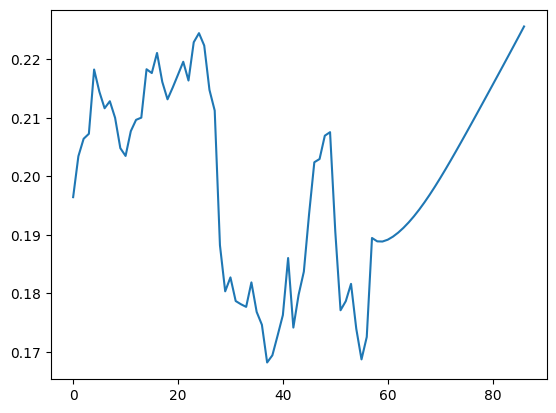

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [50]:
df3=scaler.inverse_transform(df3).tolist()

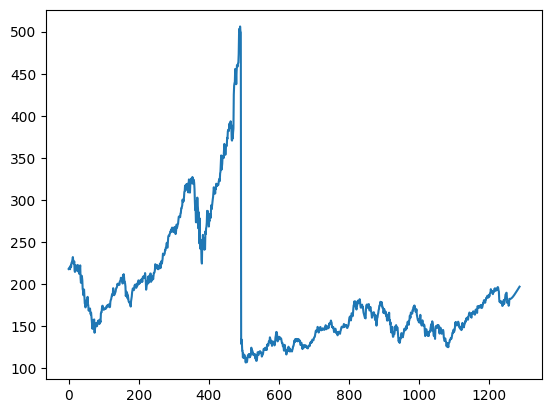

In [51]:
plt.plot(df3)